In [5]:
!pip install yfinance

     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 10.2/949.2 kB ? eta -:--:--
     - ----------------------------------- 41.0/949.2 kB 393.8 kB/s eta 0:00:03
     ------- ------------------------------ 184.3/949.2 kB 1.4 MB/s eta 0:00:01
     ------------------- ------------------ 481.3/949.2 kB 2.7 MB/s eta 0:00:01
     ------------------------- ------------ 634.9/949.2 kB 3.1 MB/s eta 0:00:01
     -------------------------------- ----- 809.0/949.2 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml)

In [17]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break
if revenue_table is None:
    raise ValueError("Tesla revenue table not found on the page.")
tesla_revenue = pd.read_html(str(revenue_table))[0]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "", regex=False).str.replace(",", "", regex=False)
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

C:\Users\shubh\AppData\Local\Temp\ipykernel_27740\2769394612.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(revenue_table))[0]


,Date,Revenue
58,2010-09-30,31
59,2010-06-30,28
60,2010-03-31,21
62,2009-09-30,46
63,2009-06-30,27


In [21]:
# Import yfinance
import yfinance as yf
# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
# Reset the index so 'Date' becomes a column
gme_data.reset_index(inplace=True)
# Display the first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
revenue_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break
if revenue_table is None:
    raise ValueError("GameStop revenue table not found on the page.")
gme_revenue = pd.read_html(str(revenue_table))[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "", regex=False).str.replace(",", "", regex=False)
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

C:\Users\shubh\AppData\Local\Temp\ipykernel_27740\451653099.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(revenue_table))[0]


,Date,Revenue
61,2010-01-31,3524
62,2009-10-31,1835
63,2009-07-31,1739
64,2009-04-30,1981
65,2009-01-31,3492


In [43]:
import matplotlib.pyplot as plt
def make_graph(stock_data, title):
    plt.figure(figsize=(4,2))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

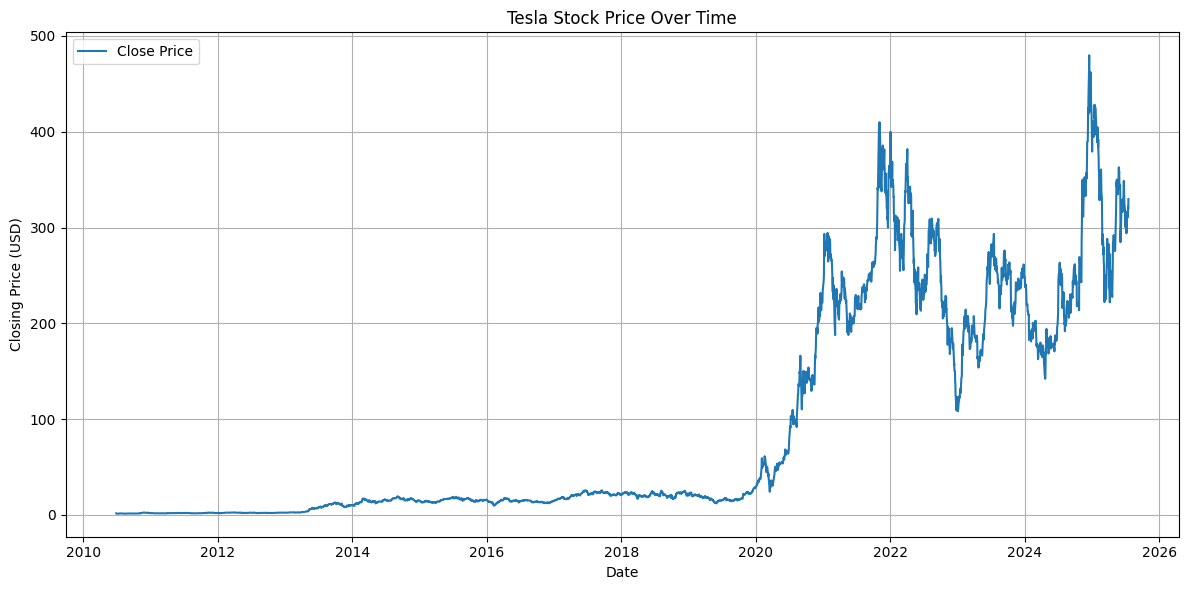

In [37]:
make_graph(tesla_data, 'Tesla Stock Price Over Time')

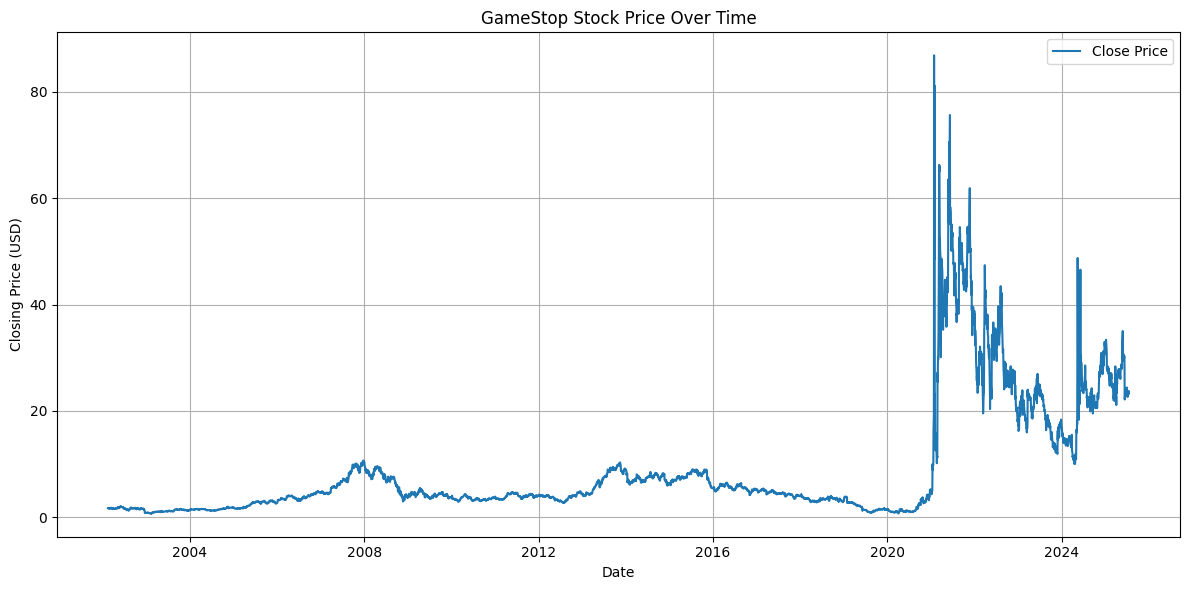

In [45]:
import matplotlib.pyplot as plt
def make_graph(stock_data, title):
    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
make_graph(gme_data, 'GameStop Stock Price Over Time')